In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
dfpacientes = pd.read_csv("BBDD_post_pabellon.csv",sep=",")
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
dfpacientes.head(20)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,53,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3,0
3,65,NO,NO,4.30,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,3,SI,NO,NO,NO,NO,SI,2,0
4,62,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,3,SI,NO,NO,NO,NO,SI,4,0
5,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
6,65,SI,NO,5.19,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,24,NO,NO,NEG,3,SI,NO,NO,NO,NO,SI,2,0
7,69,SI,NO,14.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,18,NO,NO,ADENOCARCINOMA GLEASON 7,5,SI,SI,UROCULTIVO,PSEUDOMONAS AERUGINOSA,MULTI SENSIBLE,SI,12,0
8,67,NO,NO,6.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2,0
9,69,NO,NO,6.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4,0


In [ ]:
dfpacientes = dfpacientes.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'INFECCION POSTBIOPSIA EN DIAS', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'ANTIBIOTICO PROFILAXIS'})
dfpacientes.sample(5)
#Cambiamos los nombres largos, por algunos mas sencillos

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
176,71,NO,NO,24.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
355,61,NO,NO,7.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
387,64,NO,NO,23.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0
357,67,NO,NO,100.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0,0
166,78,NO,NO,10.5,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6,NO,NO,ADENOCARCINOMA GLEASON 9,NO,NO,NO,NO,NO,NO,NO,0,0


In [ ]:
dfpacientes.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               568 non-null    int64  
 1   DIABETES                           568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES         568 non-null    object 
 3   PSA                                564 non-null    float64
 4   BIOPSIAS PREVIAS                   566 non-null    object 
 5   VOLUMEN PROSTATICO                 567 non-null    object 
 6   ANTIBIOTICO PROFILAXIS             568 non-null    object 
 7   NUMERO DE MUESTRAS TOMADAS         568 non-null    int64  
 8   CUP                                567 non-null    object 
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA  566 non-null    object 
 10  BIOPSIA                            568 non-null    object 
 11  INFECCION POSTBIOPSIA EN DIAS      568 non-null    object 

In [ ]:
#Conversion a variables numericas, pero antes se debe reemplazar los no, por un cero
dfpacientes["INFECCION POSTBIOPSIA EN DIAS"].replace({"NO": "0"}, inplace=True)
dfpacientes['INFECCION POSTBIOPSIA EN DIAS'] = dfpacientes['INFECCION POSTBIOPSIA EN DIAS'] .values.astype(int)

In [ ]:
dfpacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               568 non-null    int64  
 1   DIABETES                           568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES         568 non-null    object 
 3   PSA                                564 non-null    float64
 4   BIOPSIAS PREVIAS                   566 non-null    object 
 5   VOLUMEN PROSTATICO                 567 non-null    object 
 6   ANTIBIOTICO PROFILAXIS             568 non-null    object 
 7   NUMERO DE MUESTRAS TOMADAS         568 non-null    int64  
 8   CUP                                567 non-null    object 
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA  566 non-null    object 
 10  BIOPSIA                            568 non-null    object 
 11  INFECCION POSTBIOPSIA EN DIAS      568 non-null    int64  

In [ ]:

dfpacientes['PSA']=dfpacientes['PSA'].astype('Float64')

In [ ]:
#Se imputa PSA por la media, con el metodo fillna, para poder llenar esos valores faltantes.m   
dfpacientes['PSA'].fillna((dfpacientes['PSA'].mean()), inplace=True)

In [ ]:
dfpacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               568 non-null    int64  
 1   DIABETES                           568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES         568 non-null    object 
 3   PSA                                568 non-null    Float64
 4   BIOPSIAS PREVIAS                   566 non-null    object 
 5   VOLUMEN PROSTATICO                 567 non-null    object 
 6   ANTIBIOTICO PROFILAXIS             568 non-null    object 
 7   NUMERO DE MUESTRAS TOMADAS         568 non-null    int64  
 8   CUP                                567 non-null    object 
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA  566 non-null    object 
 10  BIOPSIA                            568 non-null    object 
 11  INFECCION POSTBIOPSIA EN DIAS      568 non-null    int64  

In [ ]:
#Al agente aislado que era la columna mas vacia lo imputamos por la moda(la cual es siempre no), ya que es categorica
dfpacientes['AGENTE AISLADO'].fillna('NO', inplace=True)

In [ ]:
dfpacientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               568 non-null    int64  
 1   DIABETES                           568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES         568 non-null    object 
 3   PSA                                568 non-null    Float64
 4   BIOPSIAS PREVIAS                   566 non-null    object 
 5   VOLUMEN PROSTATICO                 567 non-null    object 
 6   ANTIBIOTICO PROFILAXIS             568 non-null    object 
 7   NUMERO DE MUESTRAS TOMADAS         568 non-null    int64  
 8   CUP                                567 non-null    object 
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA  566 non-null    object 
 10  BIOPSIA                            568 non-null    object 
 11  INFECCION POSTBIOPSIA EN DIAS      568 non-null    int64  

In [ ]:
#Se cambio a categoricas, todas las que estaban como Object
dfpacientes['DIABETES']=dfpacientes['DIABETES'].astype('category')
dfpacientes['HOSPITALIZACIÓN ULTIMO MES']=dfpacientes['HOSPITALIZACIÓN ULTIMO MES'].astype('category')
dfpacientes['BIOPSIAS PREVIAS']=dfpacientes['BIOPSIAS PREVIAS'].astype('category')
dfpacientes['VOLUMEN PROSTATICO']=dfpacientes['VOLUMEN PROSTATICO'].astype('category')
dfpacientes['ANTIBIOTICO PROFILAXIS']=dfpacientes['ANTIBIOTICO PROFILAXIS'].astype('category')
dfpacientes['ENF. CRONICA PULMONAR OBSTRUCTIVA']=dfpacientes['ENF. CRONICA PULMONAR OBSTRUCTIVA'].astype('category')
dfpacientes['CUP']=dfpacientes['CUP'].astype('category')
dfpacientes['BIOPSIA']=dfpacientes['BIOPSIA'].astype('category')
dfpacientes['FIEBRE']=dfpacientes['FIEBRE'].astype('category')
dfpacientes['ITU']=dfpacientes['ITU'].astype('category')
dfpacientes['TIPO DE CULTIVO']=dfpacientes['TIPO DE CULTIVO'].astype('category')
dfpacientes['AGENTE AISLADO']=dfpacientes['AGENTE AISLADO'].astype('category')
dfpacientes['PATRON DE RESISTENCIA']=dfpacientes['PATRON DE RESISTENCIA'].astype('category')
dfpacientes['HOSPITALIZACION']=dfpacientes['HOSPITALIZACION'].astype('category')



In [ ]:
dfpacientes =dfpacientes.dropna(subset=['HOSPITALIZACION'])

In [ ]:

dfpacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   EDAD                               565 non-null    int64   
 1   DIABETES                           565 non-null    category
 2   HOSPITALIZACIÓN ULTIMO MES         565 non-null    category
 3   PSA                                565 non-null    Float64 
 4   BIOPSIAS PREVIAS                   563 non-null    category
 5   VOLUMEN PROSTATICO                 564 non-null    category
 6   ANTIBIOTICO PROFILAXIS             565 non-null    category
 7   NUMERO DE MUESTRAS TOMADAS         565 non-null    int64   
 8   CUP                                564 non-null    category
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA  563 non-null    category
 10  BIOPSIA                            565 non-null    category
 11  INFECCION POSTBIOPSIA EN DIAS      565 non-nu

In [ ]:
dfpacientes.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,INFECCION POSTBIOPSIA EN DIAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,63.870796,13.300098,13.001770,0.132743,0.166372,0.014159
std,9.295538,15.649307,3.930919,0.747388,0.960534,0.196993
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


In [ ]:
#Imputamos por el numero siguiente, ya que con la moda no funciona
dfpacientes['BIOPSIAS PREVIAS'].fillna(method="ffill", inplace=True)
dfpacientes['VOLUMEN PROSTATICO'].fillna(method="ffill", inplace=True)
dfpacientes['CUP'].fillna(method="ffill", inplace=True)
dfpacientes['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna(method="ffill", inplace=True)



/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
dfpacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   EDAD                               565 non-null    int64   
 1   DIABETES                           565 non-null    category
 2   HOSPITALIZACIÓN ULTIMO MES         565 non-null    category
 3   PSA                                565 non-null    Float64 
 4   BIOPSIAS PREVIAS                   565 non-null    category
 5   VOLUMEN PROSTATICO                 565 non-null    category
 6   ANTIBIOTICO PROFILAXIS             565 non-null    category
 7   NUMERO DE MUESTRAS TOMADAS         565 non-null    int64   
 8   CUP                                565 non-null    category
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA  565 non-null    category
 10  BIOPSIA                            565 non-null    category
 11  INFECCION POSTBIOPSIA EN DIAS      565 non-nu

In [ ]:
dfpacientes["BIOPSIAS PREVIAS"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["DIABETES"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["VOLUMEN PROSTATICO"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["ENF. CRONICA PULMONAR OBSTRUCTIVA"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["ITU"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["FIEBRE"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["HOSPITALIZACION"].replace({"NO":"0", "SI":"1"},inplace=True)


#Vamos a reemplazar por 0 y 1 las columnas que solo tienen como respuesta los datos booleanos








In [ ]:
dfpacientes.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,0,NO,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,NEG,1,1,0,NO,NO,NO,1,2,0
1,56,0,NO,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,NEG,1,1,0,NO,NO,NO,1,5,0
2,53,0,NO,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,NEG,2,1,1,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",1,3,0
3,65,0,NO,4.3,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,NEG,3,1,0,NO,NO,NO,1,2,0
4,62,0,NO,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,NEG,3,1,0,NO,NO,NO,1,4,0


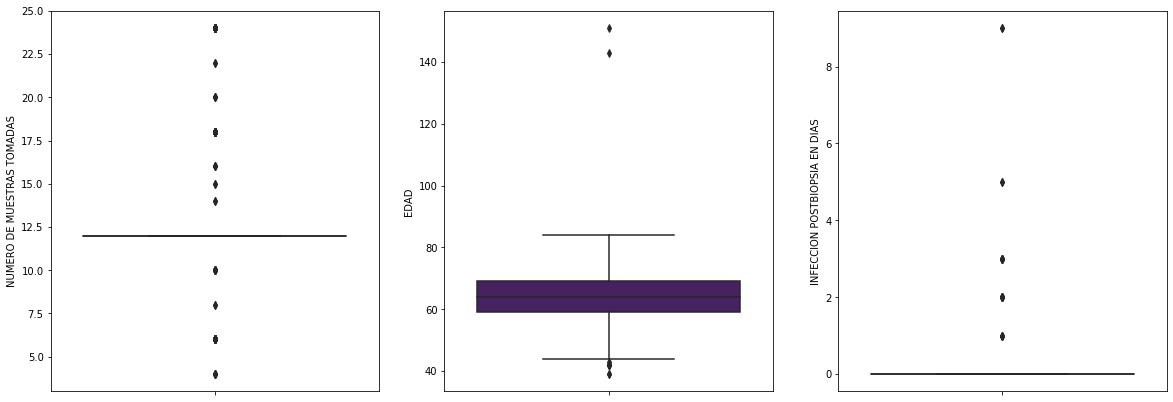

In [ ]:
fig=plt.figure(figsize=(20,7))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)


sns.boxplot(data=dfpacientes,y='NUMERO DE MUESTRAS TOMADAS',ax=ax1);
sns.boxplot(data=dfpacientes,y='EDAD',ax=ax2);
sns.boxplot(data=dfpacientes,y='INFECCION POSTBIOPSIA EN DIAS',ax=ax3);
#HACEMOS LOS BOXPLOTS CON CUANTITATIVOS

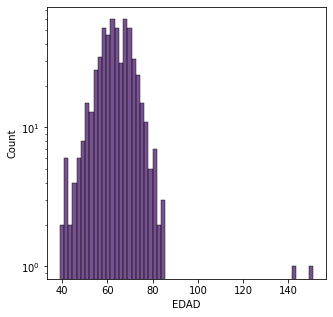

In [ ]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
sns.histplot(data=dfpacientes,x='EDAD',bins=60);
ax.set_yscale('log')
#hacemos un histplot para analizar la columna de edad

In [ ]:
dfpacientes.at[137, 'EDAD'] = dfpacientes['EDAD'].mean()
dfpacientes.at[160, 'EDAD'] = dfpacientes['EDAD'].mean()

# Verificar que los valores se han actualizado correctamente
print(dfpacientes.loc[[137, 160], 'EDAD'])







137    63
160    63
Name: EDAD, dtype: int64


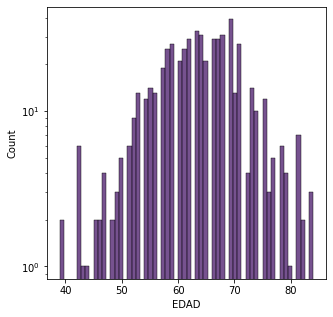

In [ ]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
sns.histplot(data=dfpacientes,x='EDAD',bins=60);
ax.set_yscale('log')
#hacemos un histplot para analizar la columna de edad

In [ ]:
dfpacientes.head(162)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,0,NO,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,NEG,1,1,0,NO,NO,NO,1,2,0
1,56,0,NO,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,NEG,1,1,0,NO,NO,NO,1,5,0
2,53,0,NO,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,NEG,2,1,1,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",1,3,0
3,65,0,NO,4.3,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,NEG,3,1,0,NO,NO,NO,1,2,0
4,62,0,NO,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,NEG,3,1,0,NO,NO,NO,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,63,0,NO,5.7,0,1,OTROS,12,NO,0,NEG,0,0,0,NO,NO,NO,0,0,0
161,70,0,NO,2.5,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,0,ADENOCARCINOMA GLEASON 6,0,0,0,NO,NO,NO,0,0,0
162,64,0,NO,12.0,1,0,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,0,ADENOCARCINOMA GLEASON 7,0,0,0,NO,NO,NO,0,0,0
163,70,0,NO,12.0,1,1,CEFALOSPORINA_AMINOGLUCOCIDO,18,NO,0,ADENOCARCINOMA GLEASON 6,0,0,0,NO,NO,NO,0,0,0


In [ ]:
pd.pivot_table(dfpacientes,index='ANTIBIOTICO PROFILAXIS',values='EDAD',aggfunc='mean')


,EDAD
ANTIBIOTICO PROFILAXIS,
CEFALOSPORINA_AMINOGLUCOCIDO,60.821429
FLUOROQUINOLONA_AMINOGLICOSIDO,63.632287
FLUOROQUINOLONA_AMINOGLICÓSIDO,65.666667
OROQUINOLONAS,66.444444
OTROS,65.238095


In [ ]:
dfpacientes['ANTIBIOTICO PROFILAXIS'] = dfpacientes['ANTIBIOTICO PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICOSIDO', 'FLUOROQUINOLONA_AMINOGLICÓSIDO')
#Reemplazamos el valor que no tenia tilde, por el que si la tenia

In [ ]:
pd.pivot_table(dfpacientes,index='ANTIBIOTICO PROFILAXIS',values='EDAD',aggfunc='mean')


,EDAD
ANTIBIOTICO PROFILAXIS,
CEFALOSPORINA_AMINOGLUCOCIDO,60.821429
FLUOROQUINOLONA_AMINOGLICÓSIDO,63.645880
OROQUINOLONAS,66.444444
OTROS,65.238095


In [ ]:
dfpacientes.describe()


,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,INFECCION POSTBIOPSIA EN DIAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,63.573451,13.300098,13.001770,0.132743,0.166372,0.014159
std,7.858704,15.649307,3.930919,0.747388,0.960534,0.196993
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000,0.000000
max,84.000000,100.000000,24.000000,9.000000,12.000000,3.000000


In [ ]:
#Utilizamos la funcion dummies en las variables categoricas

dummies = pd.get_dummies(dfpacientes["ANTIBIOTICO PROFILAXIS"])
dummies = pd.get_dummies(dfpacientes["BIOPSIA"])
dummies = pd.get_dummies(dfpacientes["TIPO DE CULTIVO"])
dummies = pd.get_dummies(dfpacientes["AGENTE AISLADO"])
dummies = pd.get_dummies(dfpacientes["PATRON DE RESISTENCIA"])
print(dummies)

      AMPI R, CIPRO R, GENTA R, SULFA M R  MULTI SENSIBLE  NO  \
0                                       0               0   1   
1                                       0               0   1   
2                                       0               0   0   
3                                       0               0   1   
4                                       0               0   1   
..                                    ...             ...  ..   
563                                     0               0   1   
564                                     0               0   1   
565                                     0               0   1   
566                                     0               0   1   
567                                     0               0   1   

     RESISTENTE A AMPI, CIPRO Y GENTA  \
0                                   0   
1                                   0   
2                                   1   
3                                   0   
4             

In [ ]:
#Despues de crearlas, es necesario concatenarlas en la base de datos real
dfpacientes = pd.concat([dfpacientes, dummies], axis=1)
#Cuando ya se concatenan, es necesario eliminar la columna original
dfpacientes.drop("ANTIBIOTICO PROFILAXIS", axis=1, inplace=True)
dfpacientes.drop("BIOPSIA", axis=1, inplace=True)
dfpacientes.drop("TIPO DE CULTIVO", axis=1, inplace=True)
dfpacientes.drop("AGENTE AISLADO", axis=1, inplace=True)
dfpacientes.drop("NO", axis=1, inplace=True)
dfpacientes.drop("PATRON DE RESISTENCIA", axis=1, inplace=True)
dfpacientes.drop("DIAS HOSPITALIZACION MQ", axis=1, inplace=True)

In [ ]:
dfpacientes.head(20)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,HOSPITALIZACION,DIAS HOSPITALIZACIÓN UPC,"AMPI R, CIPRO R, GENTA R, SULFA M R",MULTI SENSIBLE,"RESISTENTE A AMPI, CIPRO Y GENTA","RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,53,0,NO,4.0,0,1,12,NO,0,1,1,0,1,0,0,0,0,0
1,56,0,NO,7.7,0,1,12,NO,0,1,1,0,1,0,0,0,0,0
2,53,0,NO,7.0,0,1,12,NO,0,2,1,1,1,0,0,0,1,0
3,65,0,NO,4.3,0,0,12,NO,0,3,1,0,1,0,0,0,0,0
4,62,0,NO,7.0,0,1,12,NO,0,3,1,0,1,0,0,0,0,0
5,57,0,NO,29.0,1,1,24,NO,0,1,1,0,1,3,1,0,0,0
6,65,1,NO,5.19,0,1,24,NO,0,3,1,0,1,0,0,0,0,0
7,69,1,NO,14.0,0,1,18,NO,0,5,1,1,1,0,0,1,0,0
8,67,0,NO,6.2,0,1,12,NO,0,2,1,1,1,0,0,0,0,1
9,69,0,NO,6.0,0,0,12,NO,0,2,1,0,1,0,0,0,0,0


In [ ]:
dfpacientes["HOSPITALIZACIÓN ULTIMO MES"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["CUP"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["ENF. CRONICA PULMONAR OBSTRUCTIVA"].replace({"SI, EPOC":"1", "SI, ASMA":"1"},inplace=True)

In [ ]:
dfpacientes.head(20)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,HOSPITALIZACION,DIAS HOSPITALIZACIÓN UPC,"AMPI R, CIPRO R, GENTA R, SULFA M R",MULTI SENSIBLE,"RESISTENTE A AMPI, CIPRO Y GENTA","RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,53,0,0,4.0,0,1,12,0,0,1,1,0,1,0,0,0,0,0
1,56,0,0,7.7,0,1,12,0,0,1,1,0,1,0,0,0,0,0
2,53,0,0,7.0,0,1,12,0,0,2,1,1,1,0,0,0,1,0
3,65,0,0,4.3,0,0,12,0,0,3,1,0,1,0,0,0,0,0
4,62,0,0,7.0,0,1,12,0,0,3,1,0,1,0,0,0,0,0
5,57,0,0,29.0,1,1,24,0,0,1,1,0,1,3,1,0,0,0
6,65,1,0,5.19,0,1,24,0,0,3,1,0,1,0,0,0,0,0
7,69,1,0,14.0,0,1,18,0,0,5,1,1,1,0,0,1,0,0
8,67,0,0,6.2,0,1,12,0,0,2,1,1,1,0,0,0,0,1
9,69,0,0,6.0,0,0,12,0,0,2,1,0,1,0,0,0,0,0


In [ ]:
dfpacientes.rename(columns={' AMPI R, CIPRO R, GENTA R, SULFA M R': 'AMCG SR'}, inplace=True) #Cambiamos los nombres de las nuevas dummies
dfpacientes.rename(columns={'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA': 'AMSFCC CR'}, inplace=True)
dfpacientes.rename(columns={'RESISTENTE A AMPI, CIPRO Y GENTA': 'ACG SR'}, inplace=True)
dfpacientes.sample(5)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,HOSPITALIZACION,DIAS HOSPITALIZACIÓN UPC,AMCG SR,MULTI SENSIBLE,ACG SR,AMSFCC CR
538,57,0,0,0.6,0,0,12,0,0,0,0,0,0,0,0,0,0,0
146,70,0,0,26.0,0,0,12,0,0,0,0,0,0,0,0,0,0,0
210,63,0,0,9.9,0,1,12,0,0,0,0,0,0,0,0,0,0,0
362,58,0,0,14.0,0,1,12,0,0,0,0,0,0,0,0,0,0,0
472,78,0,0,21.9,0,1,6,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfpacientes.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,INFECCION POSTBIOPSIA EN DIAS,DIAS HOSPITALIZACIÓN UPC,AMCG SR,MULTI SENSIBLE,ACG SR,AMSFCC CR
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.00000,565.000000,565.000000,565.000000
mean,63.573451,13.300098,13.001770,0.132743,0.014159,0.00177,0.003540,0.003540,0.003540
std,7.858704,15.649307,3.930919,0.747388,0.196993,0.04207,0.059444,0.059444,0.059444
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,84.000000,100.000000,24.000000,9.000000,3.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
print(dfpacientes.columns)

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA',
       'INFECCION POSTBIOPSIA EN DIAS', 'FIEBRE', 'ITU', 'HOSPITALIZACION',
       'DIAS HOSPITALIZACIÓN UPC', 'AMCG SR', 'MULTI SENSIBLE', 'ACG SR',
       'AMSFCC CR'],
      dtype='object')


<AxesSubplot:xlabel='HOSPITALIZACION', ylabel='count'>

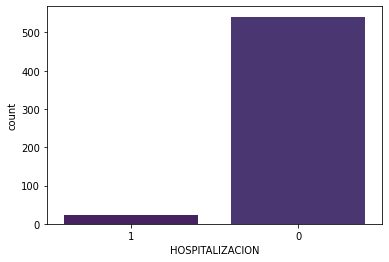

In [ ]:
sns.countplot(data=dfpacientes,x='HOSPITALIZACION')
#Se observa como se comporta la variable objetivo

<AxesSubplot:>

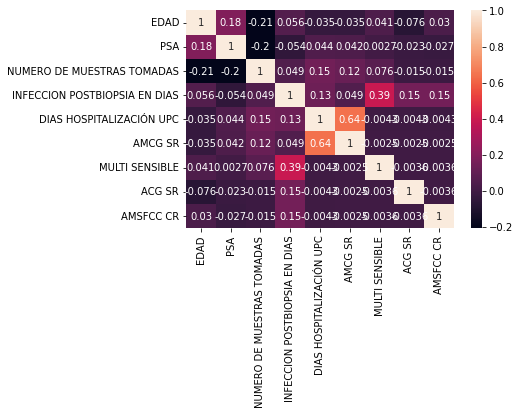

In [ ]:
corr_matrix = dfpacientes.corr()
sns.heatmap(corr_matrix, annot=True)

#al final utilizamos la matriz de correlacion, la cual se lee por colores, entre mas roja este mas relacion tiene, y entre mas azul tiene menos relacion(es decir son inversamente proporcionales)


### **AHORA EMPEZAMOS A HACER EL MODELO**


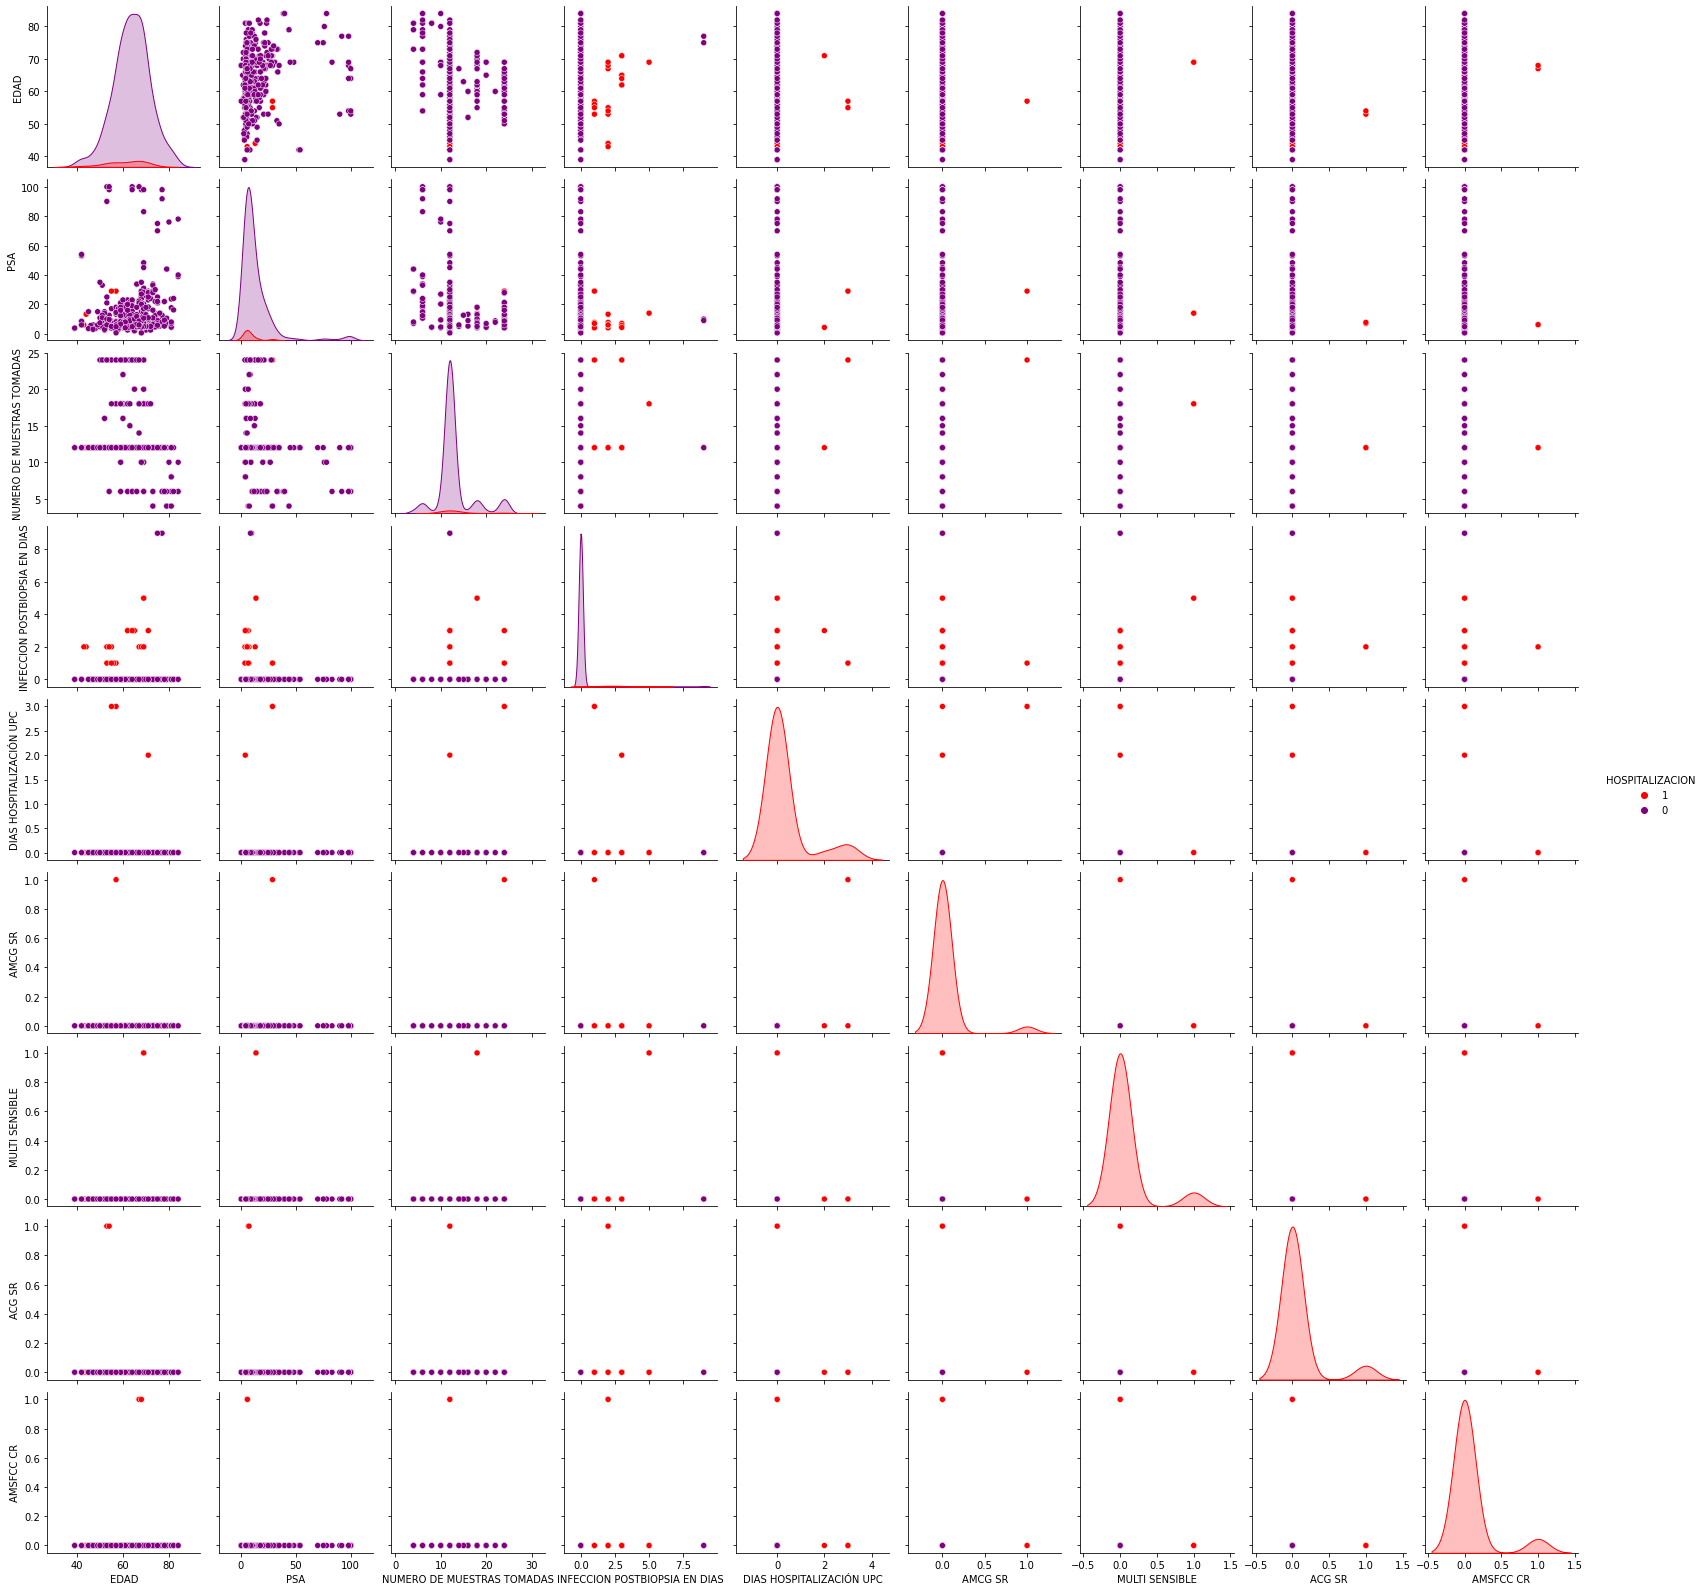

In [ ]:
#Empezamos haciendo un pairplot



palette_colors = ['r', 'purple']

sns.pairplot(dfpacientes, hue="HOSPITALIZACION", palette=palette_colors)
plt.show()

In [ ]:
X = dfpacientes[['PSA', 'NUMERO DE MUESTRAS TOMADAS','EDAD','NUMERO DE MUESTRAS TOMADAS','DIABETES','HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'FIEBRE', 'ITU', 'AMCG SR', 'AMSFCC CR','ACG SR' ]]  # Denotamos X con mayúscula ya que    #Utilice esas 2 porque tienen un alto nivel de correlacion segun la matriz
                                                     # incluye más de un atributo
y = dfpacientes.HOSPITALIZACION # Etiqueta a predecir

In [ ]:
X.head()

,PSA,NUMERO DE MUESTRAS TOMADAS,EDAD,NUMERO DE MUESTRAS TOMADAS,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,AMCG SR,AMSFCC CR,ACG SR
0,4.0,12,53,12,0,0,0,1,0,0,1,0,0,0,0
1,7.7,12,56,12,0,0,0,1,0,0,1,0,0,0,0
2,7.0,12,53,12,0,0,0,1,0,0,1,1,0,0,1
3,4.3,12,65,12,0,0,0,0,0,0,1,0,0,0,0
4,7.0,12,62,12,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 5, random_state = 42) 

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_Train

,PSA,NUMERO DE MUESTRAS TOMADAS,EDAD,NUMERO DE MUESTRAS TOMADAS,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,AMCG SR,AMSFCC CR,ACG SR
128,5.31,12,66,12,1,0,0,1,0,0,0,0,0,0,0
546,22.2,12,67,12,0,0,0,1,0,0,0,0,0,0,0
264,8.3,12,67,12,0,0,0,0,0,0,0,0,0,0,0
255,10.9,12,73,12,0,0,0,1,0,0,0,0,0,0,0
236,8.1,18,67,18,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,18.0,12,66,12,0,0,1,1,0,0,0,0,0,0,0
9,6.0,12,69,12,0,0,0,0,0,0,1,0,0,0,0
362,14.0,12,58,12,0,0,0,1,0,0,0,0,0,0,0
195,21.0,12,75,12,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Entrenamos el modelo

clf.fit(X_Train.values,Y_Train.values)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:

print(clf.classes_) #Hospitalizacion solo tiene 2 clases en los registros SI y NO
print(clf.n_classes_) #La cantidad de estas clases
print(clf.max_features_) #Numero maximo de caracteristicas
print(clf.feature_importances_)

['0' '1']
2
15
[0.32118226 0.         0.05758332 0.00217027 0.03868313 0.
 0.         0.         0.         0.         0.43531929 0.09066358
 0.05439815 0.         0.        ]


In [ ]:
y_pred = clf.predict(X_Test.values)
print(y_pred)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_Test,y_pred))



0.9788732394366197


In [ ]:
from sklearn import tree

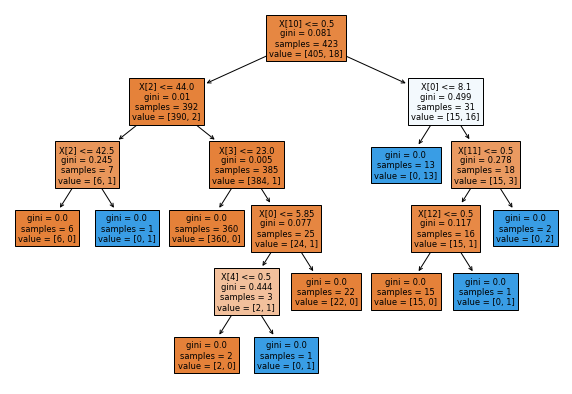

In [ ]:
plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()

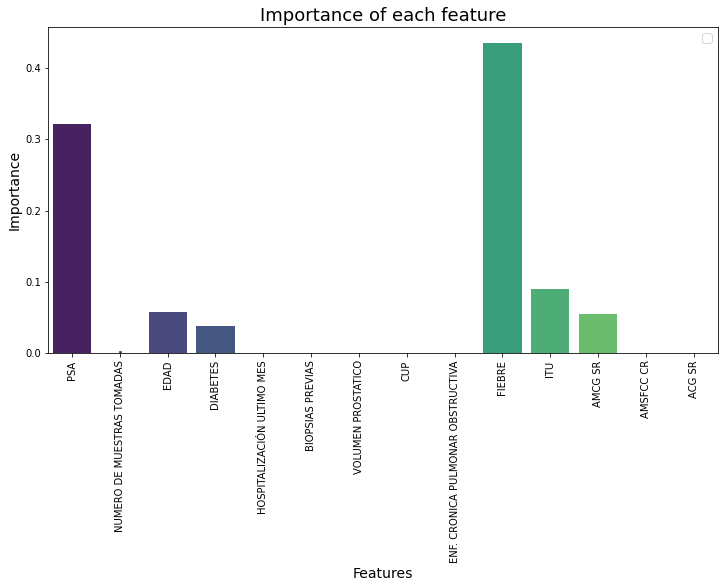

In [ ]:

plt.figure(figsize=(12, 6))

importances = clf.feature_importances_
columns = X.columns

# Rotar el texto de los nombres de las columnas
sns.barplot(x=columns, y=importances)
plt.xticks(rotation=90)

# Ajustar el tamaño de fuente de los nombres de las columnas
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)

# Usar una paleta de colores más legible
colors = sns.color_palette('viridis', len(columns))
sns.set_palette(colors)

# Ajustar el tamaño de fuente de la leyenda
plt.title('Importance of each feature', fontsize=18)
plt.legend(fontsize=12)

plt.show()


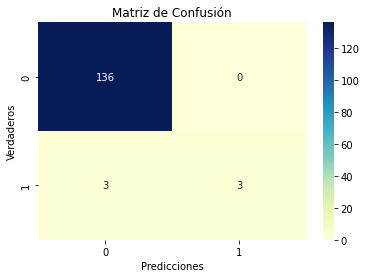

In [ ]:
#Ahora hacemos la matriz de confusion
cm = confusion_matrix(Y_Test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Matriz de Confusión")
plt.ylabel("Verdaderos")
plt.xlabel("Predicciones")
plt.show()

In [ ]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)


print("Especificidad: {:.2f}".format(specificity))
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Exactitud (Accuracy): {:.2f}".format(accuracy))



Especificidad: 1.00
Precisión: 1.00
Recall: 0.50
Exactitud (Accuracy): 0.98


In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-Score: {:.2f}".format(f1_score))



F1-Score: 0.67


# K-VECINOS


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf = KNeighborsClassifier() #No optizamos hiperparámetro aún

In [ ]:
clf.fit(X_Train.values,Y_Train.values)

KNeighborsClassifier()

In [ ]:
y_pred = clf.predict(X_Test.values)

In [ ]:

print(accuracy_score(Y_Test,y_pred))

0.9577464788732394


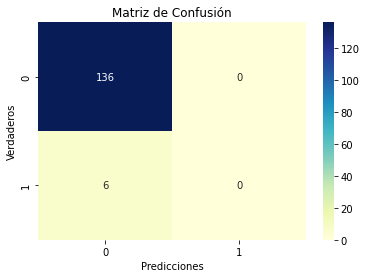

In [ ]:
#Ahora hacemos la matriz de confusion para K-VECINOS
cm = confusion_matrix(Y_Test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Matriz de Confusión")
plt.ylabel("Verdaderos")
plt.xlabel("Predicciones")
plt.show()

In [ ]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Especificidad: {:.2f}".format(specificity))
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Exactitud (Accuracy): {:.2f}".format(accuracy))


Especificidad: 1.00
Precisión: nan
Recall: 0.00
Exactitud (Accuracy): 0.96


<ipython-input-349-634e39e1146d>:3: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
